##  Video games recommendation system

The aim of this notebook is to create a recommendation system that will give the user products, similiar to the one they chose. This will be happening with the help of the Nearest neighbours model.

The iteration of the porject will be kept in a git repository
- git link - https://git.fhict.nl/I509460/video-game-reommendation.git

The project is created and work on by Mihail Kenarov


In [1]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__) # 1.4.1
print("pandas version:", pd.__version__)            # 2.2.1
print("seaborn version:", sns.__version__)          # 0.13.2

C:\Users\kenar\AppData\Local\Temp\ipykernel_18872\2891960486.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


scikit-learn version: 1.4.1.post1
pandas version: 2.2.0
seaborn version: 0.13.2


# 📦 Data provisioning



### Data Requirment 

We would need to find a suitable dataset that has some video games with data about them like genres,publishers etc.

## Data Collection 

This data is availabe at the site of Kaggle. We will be using it as a csv file that has some information that does seem quite useful for us https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024


In [16]:
df = pd.read_csv('vgchartz-2024.csv')
df.head()

(64016, 14)

We see that we do have a lot of data to work with however I do not believe that some of the columns are needed that much when It comes to finding the most suitable game for the one that a user has chosen in this Jypyter notebook. I would say that `last_update`, `img`, `pal_sales`, `other_sales` are currently unnecesary so I will drop them


In [3]:
columns_to_drop = ['last_update', 'img', 'pal_sales', 'other_sales']
cleaned_df = df.drop(columns_to_drop, axis=1)
cleaned_df.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,2015-11-06
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,2011-11-08
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,2010-11-09
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,2018-10-26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,2012-11-13
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,2012-11-13


## Current thoughts

Currenly I am not completly sure if all of these columns are things that are going to matter a lot to our system,but I will still go along with them for now. Let us create a dictionary with what we have 





## Data Dictionary

As a first attempt to improve the data requirements, I have tried to add units and ranges to the data definition. It can also help to check the consistency and validity of the data.

(0) Title: The name of the game

(1) Console: The console on which the game is played on

(2) Genre: The genre of a game

(3) Publisher: The game publishers which could be considered 'The big names' of the industry

(4) Developer: The studio that worked on the creation of the game

(5) Critic score: The score that is given to a game from a certain agency (like IGN)

(6) Total sales: The number of times the game has been sold worldwide

(7) NA sales: The number of times a game has been sold in North America

(8) Japan sales: The number of times a game has been sold in Japan

## Genre Dictionary

Action - 1

Shooter - 2

Action-Adventure - 3

Sports - 4

Role-Playing - 5

Simulation - 6

Racing - 7

Music - 8

Misc - 9

Fighting - 10

Platform - 11

Adventure - 12

Strategy - 13

Puzzle - 14

MMO - 15

Sandbox - 16

Party - 17

Education - 18

Board Game - 19

Visual Novel - 20




### For now the data seems alright but let's check if there are some empty spaces, what kind of data are we working with and some general values in the dataset

In [4]:
cleaned_df.info() # to see the type of data we are working with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   release_date  56965 non-null  object 
dtypes: float64(4), object(6)
memory usage: 4.9+ MB


In [5]:
print(cleaned_df.isna().sum()) # to see the missing values

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
release_date     7051
dtype: int64


In [6]:
print(cleaned_df.describe()) # to get a bit of general knowledge about the data in the dataset currently

       critic_score   total_sales      na_sales     jp_sales
count   6678.000000  18922.000000  12637.000000  6726.000000
mean       7.220440      0.349113      0.264740     0.102281
std        1.457066      0.807462      0.494787     0.168811
min        1.000000      0.000000      0.000000     0.000000
25%        6.400000      0.030000      0.050000     0.020000
50%        7.500000      0.120000      0.120000     0.040000
75%        8.300000      0.340000      0.280000     0.120000
max       10.000000     20.320000      9.760000     2.130000


### Current thoughts 

There is quite a lot of missing data still that I am not sure I cmopletly need. After more research I will come to a better conclusion.

## What we currently know


(5) Critic score: The maximum score is 10 and the minimum is 1(out of 10)

(6) Total sales: The maximum amount of sales of a game is 20.32 million while the minimum found was 0 on a worldwide scale

(7) NA sales:  The maximum amount of sales of a game is 9.76 million while the minimum found was 0 on a NA scale

(8) Japan sales: The maximum amount of sales of a game is 2.13 million while the minimum found was 0 on a Japan scale


### As we are about to create a video games recommendation system it would be a good idea to have some insight on the genres


In [7]:
unique_genres = cleaned_df['genre'].nunique()
print(f"Number of unique genres: {unique_genres}")
cleaned_df['genre'].unique()

Number of unique genres: 20


array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

### Let's see if we could possibly use the publishers for the creation of our recommendation system


In [8]:
unique_genres = cleaned_df['publisher'].nunique()
print(f"Number of unique publishers: {unique_genres}")
cleaned_df['publisher'].unique()

Number of unique publishers: 3383


array(['Rockstar Games', 'Activision', 'EA Sports', ...,
       "Mind's Eclipse Interactive", 'Walkabout', 'InvertMouse'],
      dtype=object)

### Let's also have a look at the amount of games from a specific publisher


In [9]:
publisher_counts = cleaned_df['publisher'].value_counts()
print(publisher_counts)

publisher
Unknown               8842
Sega                  2207
Ubisoft               1663
Electronic Arts       1619
Activision            1582
                      ... 
Cancer Research UK       1
XperimentalZ Games       1
Nano Games               1
Cooking Mama Ltd.        1
PLAYDIUS                 1
Name: count, Length: 3383, dtype: int64


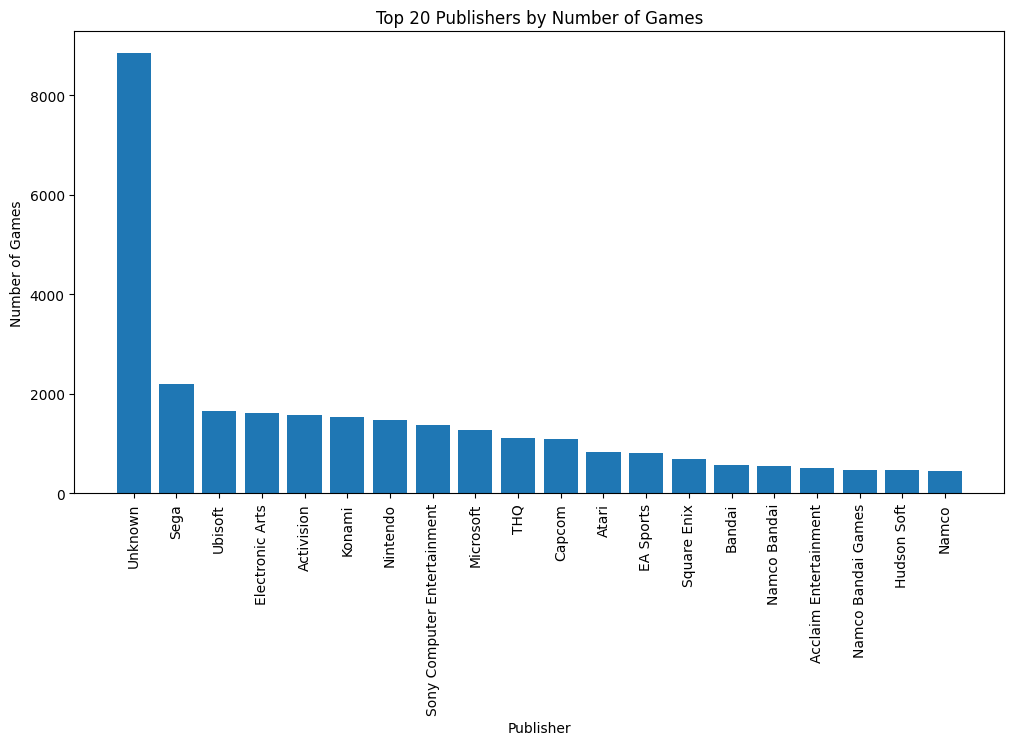

In [10]:
# Let's visualize the results for a better understanding
publisher_counts = cleaned_df['publisher'].value_counts()

# Select the top 20 publishers
top_20_publishers = publisher_counts[:20]

# Create a bar chart for the top 20 publishers
plt.figure(figsize=(12, 6)) # Adjust the size of the figure
plt.bar(top_20_publishers.index, top_20_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Top 20 Publishers by Number of Games')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

### It does not look very promising to try and calculate things based of the publishers 


## We are also going to be using the critic scores so it might be a good idea to see the range and distribution of the critic scores seperatly


In [11]:
critic_score_range = cleaned_df['critic_score'].describe()
print(critic_score_range)

count    6678.000000
mean        7.220440
std         1.457066
min         1.000000
25%         6.400000
50%         7.500000
75%         8.300000
max        10.000000
Name: critic_score, dtype: float64


In [12]:
cleaned_df.sample(25)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,release_date
21611,Nazo no Murasame-Jou,VC,Action,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,2008-08-19
15152,Powerbike,DS,Racing,Majesco,Tornado Studios,NaN,0.02,0.01,NaN,2009-06-02
61558,Command & Conquer: Red Strike,PC,Strategy,Electronic Arts,Westwood Studios,NaN,NaN,NaN,NaN,2002-03-20
59246,Malibu Beach Volleyball,Lynx,Sports,Atari,Atari,NaN,NaN,NaN,NaN,1990-01-01
1920,The Crew 2,PS4,Racing,Ubisoft,Ivory Tower,6.5,0.82,0.22,0.05,2018-06-29
55858,Microsoft Flight Simulator,Series,Simulation,Microsoft,Sublogic,NaN,NaN,NaN,NaN,1982-11-01
47447,Mario Kart 64,WiiU,Racing,Unknown,Nintendo,NaN,NaN,NaN,NaN,NaN
29580,Asterix & Obelix XXL 3: The Crystal Menhir,XOne,Action-Adventure,Microids,OSome Studio,NaN,NaN,NaN,NaN,2019-11-21
59340,NBA 2K10,XBL,Sports,2K Sports,Visual Concepts,NaN,NaN,NaN,NaN,2010-11-16
29165,Driver,All,Action-Adventure,GT Interactive,Reflections Interactive,NaN,NaN,NaN,NaN,1999-06-30


In [13]:
cleaned_df.shape

(64016, 10)

### I am beggining to question if dropping the rows where the critic scores is missing would be a good idea, but I am still not 100% sure, maybe some kind of imputation might work, but still it is hard to do so, since there are action games for example that get a higher or lower rating
    higher rating - 7.3	-Elebits 
    lower rating - 3.0	-Prison Break: The Conspiracy	

## Let's consider the idea of that each game is connected to only one genre, this way we can label the genres with a specific number so that it might be easier for the model to differentiate which game is which!

### (A dictionary was added beforehand for easier understanding)

In [14]:
genre_mapping = {
    'Action': 1,
    'Shooter': 2,
    'Action-Adventure': 3,
    'Sports': 4,
    'Role-Playing': 5,
    'Simulation': 6,
    'Racing': 7,
    'Music': 8,
    'Misc': 9,
    'Fighting': 10,
    'Platform': 11,
    'Adventure': 12,
    'Strategy': 13,
    'Puzzle': 14,
    'MMO': 15,
    'Sandbox': 16,
    'Party': 17,
    'Education': 18,
    'Board Game': 19,
    'Visual Novel': 20
}


# Applying the mapping to the genre column and store the result in a new column 'genred_lbl'
cleaned_df['genred_lbl'] = cleaned_df['genre'].map(genre_mapping)


# verifying the transformation
print(cleaned_df[['genre', 'genred_lbl']].sample(15))




                  genre  genred_lbl
24012            Action           1
37566              Misc           9
37877              Misc           9
29046  Action-Adventure           3
50262      Role-Playing           5
7632             Racing           7
704              Sports           4
50849      Role-Playing           5
10742           Shooter           2
62736          Strategy          13
37776              Misc           9
12772            Action           1
16407            Puzzle          14
12564            Action           1
42315          Platform          11


## Now let's see what we have done with the changes


In [15]:
cleaned_df.sample(15)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,release_date,genred_lbl
9124,Learn Math,DS,Puzzle,DreamCatcher Interactive,DreamCatcher Interactive,NaN,0.13,0.12,NaN,2009-12-22,14
33062,Beat Planet Music,PS,Misc,Sony Computer Entertainment,Sony Computer Entertainment,NaN,NaN,NaN,NaN,2000-01-20,9
29258,Rygar,Series,Action-Adventure,Tecmo,Tecmo,NaN,NaN,NaN,NaN,1987-04-17,3
57534,Doraemon: Nobita's Story of Seasons,NS,Simulation,Bandai Namco,Marvelous,NaN,NaN,NaN,NaN,2019-10-11,6
33094,Bibi & Tina - Das Spiel zum Kinofilm,3DS,Misc,Kiddinx,Unknown,NaN,NaN,NaN,NaN,2014-02-27,9
291,Medal of Honor,PS3,Shooter,Electronic Arts,EA Los Angeles,6.7,2.82,1.28,0.07,2010-10-12,2
51474,Persona 3 Reload,PC,Role-Playing,Unknown,Atlus,NaN,NaN,NaN,NaN,NaN,5
40195,Apple Panic,All,Platform,Broderbund,Ben Serki,NaN,NaN,NaN,NaN,1981-01-01,11
12191,Growlanser: Wayfarer of Time,PSP,Role-Playing,Atlus,Career Soft,NaN,0.06,NaN,0.06,2012-07-24,5
53545,Jake's Room,XBL,Shooter,Microsoft,Dennis McWilliams,NaN,NaN,NaN,NaN,2009-09-26,2


### Look into the 3 possibilities for now and discuss
    pairwise deletion
    listwise deletion
    fidning the average/mean of a specific genre and imputing it

    using another dataset and maybe checking if for the idea that the title of a game is in bouth and we might get the ratig from a different dataset
    